# Binary Classification in Python - Bank Marketing

<p>The data used in this project consists of information acquired during direct marketing campaigns of a Portuguese banking institution. The main task here is to predict if the client will subscribe a term deposit or not.</p>
<p>This dataset was taken from Kaggle website. The file used for predictions, <em>bank.csv</em>, is available <a href="https://www.kaggle.com/sonujha090/bank-marketing">here</a>, along with more detailed description.</p>
<p>I am going to start with some exploratory data analysis, followed by data cleaning and preprocessing. Then, after selecting relevant features, I will try to perform machine learning techniques to predict the most accurate output, using both linear and tree-based algorithms, making a comparison of these two approaches.</p>
<p>To begin with, I will import neccessary packages and functions and load the dataset.</p>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings; warnings.simplefilter('ignore')


%matplotlib inline

In [30]:
data = pd.read_csv("bank.csv")

## Exploratory Data Analysis
<p>After making all the imports and loading dataset, it is natural step to overview our data. We can see, that there are 16 variables and the output variable <em>y</em>, which can be divided into 3 groups:</p>
<p><b>Bank client data:</b></p> 
<p>1 - age (numeric) 2 - job: type of job (categorical: "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")</p>
<p><b>Data related with to last contact of the current campaign:</b></p>
<p>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)</p>
<p><b>Other attributes:</b></p>
<p>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</p>
<p>The output variable (desired target), y, records the information if the client has subscribed a term deposit? (binary: "yes","no")</p>

In [31]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
data.shape

(4521, 17)

In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


<p>As we can see, there are 10 categorical variables and 7 numeric features. It seems that data is in good shape and does not need cleaning, i.e. there are no missing values. Below is the summary of both continuous and categorical variables.</p>

In [35]:
# A subset of numeric data for future use. Also a convenient way to display characteristics of the variables.
data_numeric = data[data.describe().columns]
data_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [36]:
# A subset of categorical data for future use. Also a convenient way to display characteristics of the variables.
data_categorical = data[data.describe(include=["object"]).columns]
data_categorical.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


<p>In the numeric subset, it is noticeable that the variables <b>pdays</b> and <b>previous</b> are strongly correlated with each other - both of them are dominated by -1 and 0 values respectively and for <i>pdays</i> = -1, the corresponding row in <i>previous</i> equals 0 for at least 75% of the observations.</p>
<p>As for the categorical variables, we can observe that in the <b>poutcome</b> column, for 3705 observations the outcome of the previous marketing campaign is unknown. We can consider them as missing data, which makes this column a strong candidate to be removed, since it does not give us much information. Moreover, 4000 out of 4521 clients have not subscribed to the bank's offer, so there is a huge imbalance in the output variable.</p>
<p>Before removing <i>poutcome</i> variable, it might be reasonable to check if there is any binding between number of clients who previously subscribed to the bank's offer and who subscribed to the current offer. As mentioned before, at first glance, due to many missing values, it seems <i>poutcome</i> should be removed. However, it might occur that there is huge probability, that if client previously subscribed to the offer, then he or she will be more likely to accept current offer.</p>

In [37]:
# 2 subsets of clients who subscribed to the service and who did not. Both will be also usefull to visualize the class
# imbalance later.
data_yes = data[data["y"] == "yes"]
data_no = data[data["y"] == "no"]

data_yes["poutcome"].value_counts()

unknown    337
success     83
failure     63
other       38
Name: poutcome, dtype: int64

<p>The figure above shows the counts of previous campaign result among the clients, who subscribe to the offer during current campaign. The percentage of this fration among subscribers is:</p>

In [38]:
print(round(len(data_yes[data_yes["poutcome"] == "success"])/len(data_yes)*100, 2),"%", sep='')

15.93%


In [39]:
data["poutcome"].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

<p>On the contrary, here I am going to check how big is the group of clients who subscribed during previous campaign comparing to the whole population in the dataset:</p>

In [40]:
print(round(len(data[data["poutcome"] == "success"])/len(data)*100, 2),"%", sep='')

2.85%


<p>It turns out that among people, who currently subscribe the deposit term, 15.93% of them subscribed the deposit term previously as well. The overall number of clients who previously subscribed to the bank's offer constitutes 2.85% of all tested clients, so we can observe a slight correlation of these 2 traits. However, in my opinion these numbers are still too small and, as mentioned before, the amount of "unknown" records is too big, which makes this column irrelevant.</p>

## Data Cleaning and Preprocessing
<p>In one of the previous paragraphs I highlighted the problem with <i>pdays</i> columns, populated mostly with "-1" records. However, instead of completely removing this column, we can still extract valuable information from it. Here, I will create a new column, indicating if the client was previously contacted or not, instead of keeping track of days passed by after the client was last contacted from a previous campaign.</p>

In [41]:
data_numeric["contacted"] = data_numeric["pdays"].apply(lambda val: "no" if val == -1 else "yes")

<p>Since this variable is now no longer numeric and has become categorical, I will add it to the appropriate subset.</p>

In [42]:
contacted = data_numeric["contacted"]
data_categorical = pd.concat([data_categorical, contacted], axis=1)

In [43]:
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,contacted
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,yes
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,yes
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,no


<p>Below I am removing the irrelevant variables. As stated above, due to mostly missing values, <i>poutcome</i> is useless. Since I recoded the variable <i>pdays</i>, I do not need it anymore. As for the <i>previous</i> column, if <i>pdays</i> was equal to -1, which means that the client was not previously contacted, then the number of days passed since the last contact must have been 0. I therefore remove this column, along with <i>contacted</i>, which remained after above mentioned encoding and is now doubled with the same column in categorical subset.</p>

In [44]:
to_drop_numeric = ["pdays", "previous", "contacted"]
to_drop_categorical = ["poutcome"]

data_numeric = data_numeric.drop(to_drop_numeric, axis=1)
data_categorical = data_categorical.drop(to_drop_categorical, axis=1)

<p>Another problem of this dataset, which was not talked before, is the huge variance of some of the numeric columns. Especially variables such as <b>balance</b> and <b>duration</b> suffer from this, having much higher orders of magnitude than the rest of the variables, which is shown in the below figure, followed by 2 plots.</p>

In [48]:
data_numeric.var()

age         1.118562e+02
balance     9.057922e+06
day         6.802402e+01
duration    6.752547e+04
campaign    9.670897e+00
dtype: float64

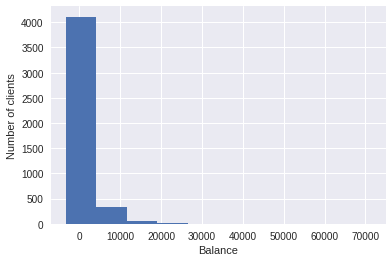

In [49]:
balance_plot = data_numeric['balance'].plot(kind="hist")
balance_plot.set(xlabel="Balance", ylabel="Number of clients")
plt.show()

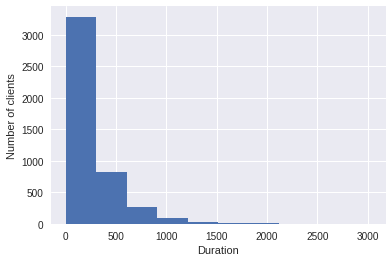

In [50]:
duration_plot = data_numeric['duration'].plot(kind="hist")
duration_plot.set(xlabel="Duration", ylabel="Number of clients")
plt.show()

<p>This can bias the model, resulting in poor performance of our predictions. To face this problem, and ensuring that the variables have distribiution close to the normal, which is needed for many machine learning models, I will now scale these values, so they can be used in our models.</p>

In [52]:
# Here I instantiate the StandardScaler
ss = StandardScaler()

# Here I create a DataFrame with scaled values
numeric_scaled = pd.DataFrame(ss.fit_transform(data_numeric), columns = data_numeric.columns)
numeric_scaled.head()

,age,balance,day,duration,campaign
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829


In [53]:
# The variance of numeric variables after scaling
numeric_scaled.var()

age         1.000221
balance     1.000221
day         1.000221
duration    1.000221
campaign    1.000221
dtype: float64

<p>Since Scikit-learn models require features to be numeric, I need to encode the categorical variables to the numeric ones. From the figure shown in the Exploratory Data Analysis section we know, that out of 10 categorical columns 5 of them was binary and 5 was multi-class columns. I am going to use different approaches to deal with both of these cases. Next, I will remove the columns in their original form to have only those encoded.</p>

In [56]:
# For binary variables, I will use LabelEncoder
le = LabelEncoder()
data_categorical["default_enc"] = le.fit_transform(data_categorical["default"])
data_categorical["housing_enc"] = le.fit_transform(data_categorical["housing"])
data_categorical["loan_enc"] = le.fit_transform(data_categorical["loan"])
data_categorical["y_enc"] = le.fit_transform(data_categorical["y"])
data_categorical["contacted_enc"] = le.fit_transform(data_categorical["contacted"])
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,y,contacted,default_enc,housing_enc,loan_enc,y_enc,contacted_enc
0,unemployed,married,primary,no,no,no,cellular,oct,no,no,0,0,0,0,0
1,services,married,secondary,no,yes,yes,cellular,may,no,yes,0,1,1,0,1
2,management,single,tertiary,no,yes,no,cellular,apr,no,yes,0,1,0,0,1
3,management,married,tertiary,no,yes,yes,unknown,jun,no,no,0,1,1,0,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,no,no,0,1,0,0,0


In [57]:
# For multiclass columns, I will perform one-hot encoding using dummy variables
job_enc = pd.get_dummies(data_categorical["job"])
marital_enc = pd.get_dummies(data_categorical["marital"])
education_enc = pd.get_dummies(data_categorical["education"])
contact_enc = pd.get_dummies(data_categorical["contact"])
month_enc = pd.get_dummies(data_categorical["month"])

In [58]:
# Here I concatenate all the encoded variables
categorical_encoded = pd.concat([data_categorical, job_enc, marital_enc, education_enc, contact_enc, month_enc], axis=1)

In [60]:
# In this step I am removing features in their original form
to_drop = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "y", "contacted"]

categorical_encoded = categorical_encoded.drop(to_drop, axis=1)

In [62]:
# After scaling numeric variables and encoding categorical columns, I concatenate all the variables together.
data_cleaned = pd.concat([numeric_scaled, categorical_encoded], axis=1)

<p>Now that all the variables are normalized, I will separate the dependent variable from the features:</p>

In [64]:
features = data_cleaned.drop(['y_enc'], axis=1)
label = data_cleaned["y_enc"]

## Selecting relevant features with Principal Component Analysis (PCA)
<p>After cleaning and preprocessing the data, mostly due to encoding multi-class variables, I ended up with more variables than in the original dataset. I am therefore going to check if it is possible to simplify my models and use as few features as necessary to achieve the best result and erase the noise. To do this, I will use PCA approach to check if it is possible to reduce the dimensionality the data by using the fraction of features that explain most of the variance in the dataset. To get better sense of the problem, I will also visualize the result:</p>

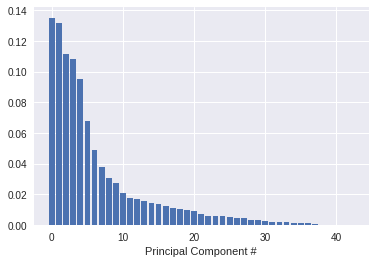

In [65]:
# Instantiate PCA, fit it and extract the explained variance ratio, which will show how much of the variance is explained
# by individual variables.
 
pca = PCA()
pca.fit(features)
exp_variance = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

<p>The plot above suggest, that the "elbow" is located around 10th variable, which means we can use 10 most important features as a cut-off point. Below is the graph of the aggregated variance of the variables. For clarity, I marked the line indicating the level of 80% of the variance, which, taking into account the huge number of features, might be considered as satisfactory.</p>

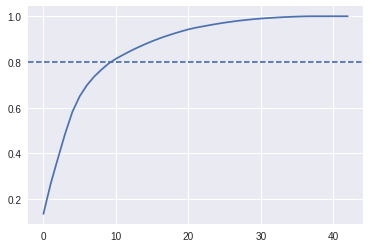

In [66]:
# Sum the variance and create a plot, indicating 80% threshold level
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.8, linestyle='--')

<p>As we can see, the 10 most important variables explain slightly more than 80% of the variance. I will therefore modify the previously instantiated <i>pca</i> object, setting its <i>n_components</i> parameter to 10.</p>

In [67]:
pca = PCA(n_components=10)
pca_features = pca.fit_transform(features)

## Modelling
<p>To meet the goal of this project, i.e. to correctly predict if the client will subscribe to the term deposit or not, I will use few examples of both linear and tree-based classifiers with different settings, trying to choose the one that performs best.</p>
<p>Before splitting the data into train and test sets, it is worth to note one problem of the dataset. As we saw in the EDA step, the output variable <i>y</i> is strongly imbalanced. The situation is shown on the pie chart below:</p>

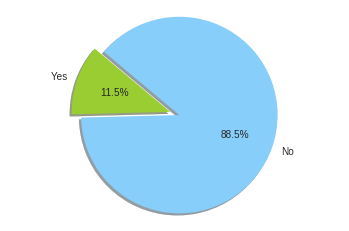

In [70]:
# Here I use the previously created subsets to show the dependent variable imbalance
plt.pie([len(data_yes), len(data_no)], explode=(0.1, 0), labels=('Yes', 'No'),
        colors=['yellowgreen', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

<p>Since 88.5% of the outputs is <i>No</i>, it may happen, that during splitting our data, the training set may not "see" the <i>Yes</i> records. To project the distribution of the output variable, I will set the <i>stratify</i> parameter to <i>label</i>, which will help with this problem.</p>

In [71]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, label, stratify=label)

### Linear classifiers
<p>The first group of classifiers is linear and it consists of <b>Logistic Regression</b>, <b>SVM</b> and an ensamble method <b>SGDClassifier</b>.</p>

In [72]:
# Logistic Regression with default parameters
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Logistic Regression accuracy:", lr.score(X_test, y_test))

Logistic Regression accuracy: 0.896551724137931


<p>Logistic Regression with default parameters and features indicated by PCA predicted correctly approx. <b>89.7%</b> of the labels. To find out if reducing dimensionality was a right choice, I will now perform a Logistic Regression with cross validation on all features.</p>

In [73]:
# cross validation with ensuring the appropriate distribution of the output variable
skf = StratifiedKFold(n_splits = 10)
log_reg = LogisticRegression()
log_score = cross_val_score(log_reg, features, label)

print("Logistic Regression with CV:", np.mean(log_score))

Logistic Regression with CV: 0.8909546178424353


<p>The model performs slightly worse with all features involved. The next alogrithm used is <b>SVM</b>.</p>

In [74]:
svm = LinearSVC()
svm.fit(X_train, y_train)

print("SVM accuracy:", svm.score(X_test, y_test))

SVM accuracy: 0.8938992042440318


<p>This model works better than Logistic Regression with CV, but its accuracy in lower than in case of the first model.</p>
<p>The last linear model used in this notebook is going to be a mix of both Logistic Regression and SVM. Using GridSearch CV, I will try to tune the model, checking different combinations of parameters default for both models.</p>

In [77]:
linear_classifier = SGDClassifier()

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}

searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)


print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.891740412979351


<p>All of the 3 models are really close to each other when it comes to predicting accuracy. Surprisingly, the worst score comes from the SGDClassifier.</p>

### Tree-based classifiers
<p>The next set of models consists of Tree-based classifiers such as Decision Tree, Random Forest and XGBoost. For all of the models I will perform tuning in order to find the most accurate model.</p>

In [80]:
dt = DecisionTreeClassifier()

params_dt = {
        'max_depth': [3, 4,5, 6],
        'min_samples_leaf': [0.04, 0.06, 0.08],
        'max_features': [0.2, 0.4,0.6, 0.8]
            }
grid_dt = GridSearchCV(estimator=dt,
                    param_grid=params_dt,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
best_CV_score = grid_dt.best_score_

print('Best hyperparameters:\n', best_hyperparams)
print('Best CV accuracy', best_CV_score)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Best CV accuracy 0.8893805309734514


<p>The accuracy is close to the previous results. However, Decision Tree is the first model that classified correclty less than 89% of observations.</p>

In [81]:
rfc = RandomForestClassifier()

params_rfc = {
            'n_estimators': [300, 400, 500],
            'max_depth': [4, 6, 8],
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']
            }

grid_rfc = GridSearchCV(estimator=rfc,
            param_grid=params_rfc,
            cv=3,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1)

grid_rfc.fit(X_train, y_train)

best_hyperparams_rfc = grid_rfc.best_params_
best_rfc_CV_score = grid_rfc.best_score_

print('Best hyerparameters:\n', best_hyperparams_rfc)
print('Best CV accuracy', best_rfc_CV_score)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.7min finished


Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}
Best CV accuracy 0.884660766961652


<p>Random Forest performed even worse.</p>
<p>Since all the accuracy scores are really close to each other, in case of the last classifier, <i>XGBoost</i>, I will try 2 different tuning methods. Besides previously used GridSearchCV, the second one is RandomizedSearchCV.</p>

In [82]:
gbm_param_grid = {
    "learning_rate": [0.01,0.1,0.5,0.9],
    'n_estimators': [200],
    'subsample': [0.3, 0.5, 0.9]
    }

gbm = xgb.XGBClassifier()
grid_acc = GridSearchCV(
    estimator=gbm,
    param_grid=gbm_param_grid,
    scoring="accuracy",
    cv=4, verbose=1
        )
grid_acc.fit(pca_features, label)

print("Best parameters found: ",grid_acc.best_params_)
print('Best CV accuracy', grid_acc.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.0min finished


Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5}
Best CV accuracy 0.8909533289095333


In [83]:
gbm_rand_param_grid = {
    "learning_rate": np.arange(0.05,1.05,.05),
    'n_estimators': [200],
    'subsample': np.arange(0.05,1.05,.05)
    } 

rand_acc = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=gbm_rand_param_grid,
    n_iter=25,
    scoring="accuracy",
    cv=4, verbose=1
        )
rand_acc.fit(pca_features, label)

print("Best parameters found: ",rand_acc.best_params_)
print('Best CV accuracy', rand_acc.best_score_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


Best parameters found:  {'subsample': 0.7000000000000001, 'n_estimators': 200, 'learning_rate': 0.05}
Best CV accuracy 0.8865295288652952


<p>None of the approaches got better score than the Logistic Regression.</p>

## Summary
